<a href="https://colab.research.google.com/github/matheusbuniotto/portfolio/blob/main/%5BPROJETO_DSNP%5D_Churn_Prediction_para_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="#"><img src="https://github.com/matheusbuniotto/portifolio/blob/main/logo_vertical.png?raw=true" width='210px' alt="logo" border="0"></a>

#### **Data Science na Prática**
#### *Projeto - Prevendo o Churn em uma empresa de Telecoomunicação*
*por Matheus Buniotto*

---


# Projeto - Churn Rate Prediction
> 
O Churn rate é uma métrica utilizada para detectar a perda de clientes em um determinado período e é muito utilizada em empresas SaaS (Software as a Services) ou que trabalham com produtos ou serviços por assinatura.

O calcúlo do Churn Rate é representado pela formúla:

![Curn](https://agendor-blog-uploads.s3.sa-east-1.amazonaws.com/2017/06/11181759/churn-rate-03.png)
Fonte: [Meet](https://meetime.com.br/blog/gestao-empresarial/reducao-de-churn/)

**A importância do Churn Rate**

A fidelização de um cliente é fundamental o sucesso das empresas. 

> “Manter um cliente é muito mais barato do que atrair um novo”

Isso faz sentido, afinal, você não precisa gastar tempo e recursos para atrair alguém que já é seu cliente.

Hoje, essa máxima é ainda mais importante e as cada vez mais as empresas estão despendendo esforços para que haja uma maior retenção dos consumidores.

### **O problema**
![Churn](https://ikarus.digital/wp-content/uploads/5d0136e22309e039a15a700f_churn-14-original.jpg)
Manter uma taxa de Churn o mais baixo possível representa um aumento significativo nos lucros da empresa. 

Se você ainda não está convencido, um estudo conduzido por Frederick Reichheld da Bain & Company(o inventor do NPS), revelou que melhorar a retenção de clientes em apenas 5% pode aumentar os lucros da empresa de 25 a 95%!

Fonte: [Harvard Business Review](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)


* Você já imaginou se pudessemos prever um cliente que provavelmente cancelará sua assinatura?


### **Hipótese**

Utilizando dados históricos de clientes e através de algorítimos de Machine Learning podemos prever a probabilidade de um cliente cancelar sua assinatura.

Sabendo qual cliente terá maior chance de desistir de sua assinatura podemos direcionar os esforços para mante-lo fiel ao produto ou serviço. 

Podemos ainda, utilizar os dados do cliente para fazermos uma oferta especial e personalizada à ele, dessa forma podemos aumentar a satisfação do cliente em relação ao serviço ou produto ofertado. 

> **91%** dos consumidores dizem que são mais propensos a comprar com marcas que fornecem ofertas e recomendações que são relevantes para eles. - *Accenture*

>
### **O Projeto**

Nesse projeto irei utilizar os dados fornecidos originalmente na plataforma de ensino da IBM Developer, e refletem um problema típico de Churn em empresas de telecomunicação.

Utilizando os dados, iremos prever os clientes que serão mais propensos à cancelar o serviço. 

## 1. Aquisição dos dados

Como citado acima, os dados foram disponibilizados pela plataforma IBM Developer, e podem ser encontrados através do link: [IBM](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#)

Apesar de não termos informações explícitas sobre o que cada variável representa, os nomes das colunas nos permite entender o que cada uma representa. 

In [125]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
%matplotlib inline


# importar os dados
PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(PATH)



## 2. Análise explorátória
Nessa etapa iremos entender os dados, sua composição, formatos, estrutura, etc. Além disso, vamos transforma-los em gráficos que facilitem a compreensão e nos ajude a extrair informações relevantes para contrução do nosso modelo.

 Verificando as 5 primeiras entradas do conjunto de dados. Vamos ver qual é a "cara" dos nossos dados.

In [126]:
# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Tamanho,composição e formato dos dados.

In [127]:
df.shape

print('O conjunto de dados possui: {:} entradas'.format(df.shape[0]))
print('O conjunto de dados possui: {:} variáveis'.format(df.shape[1]))

O conjunto de dados possui: 7043 entradas
O conjunto de dados possui: 21 variáveis


In [128]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Vemos que a variável TotalCharges, que representa o valor total de recargas, está em formato *object*. Como a variável representa um valor numérico, vamos realizar uma conversão para tipo numérico.

A coluna CostumerID não irá influenciar em nossa análise, por se tratar de uma identificação do cliente e não agregará em nosso modelo.

In [129]:
#converter TotalCharges para float64
df.TotalCharges = df.TotalCharges.replace(" ", 0).astype('float64')

In [130]:
df.TotalCharges.dtypes

dtype('float64')

In [131]:
df.drop(('customerID'), axis=1, inplace=True)

Vamos investigar a nossa variável **Alvo - Churn!**

In [132]:
df['Churn'].unique().tolist()

['No', 'Yes']

In [133]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

A variável Churn é composta de por Sim e Não. Mais a frente iremos balancear os Churn para que nosso modelo possa aprender sem nenhum viés. 

Grande parte das variáveis do conjunto de dados são variáveis categóricas, vamos enteder como elas são compostas:


In [134]:
#criar df para ver as categorias das colunas
df_categorias = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1) 

In [135]:
for c in df_categorias.columns:
  print(c, ':', df[c].nunique(), 'categorias')

gender : 2 categorias
SeniorCitizen : 2 categorias
Partner : 2 categorias
Dependents : 2 categorias
PhoneService : 2 categorias
MultipleLines : 3 categorias
InternetService : 3 categorias
OnlineSecurity : 3 categorias
OnlineBackup : 3 categorias
DeviceProtection : 3 categorias
TechSupport : 3 categorias
StreamingTV : 3 categorias
StreamingMovies : 3 categorias
Contract : 3 categorias
PaperlessBilling : 2 categorias
PaymentMethod : 4 categorias
Churn : 2 categorias


Vamos criar 2 listas, representando as variáveis binárias e não binárias. Isso facilitará o tratamento das variáveis futuramente.

In [136]:
categorias_binarias = []
categorias_n_binarias = []

for c in df_categorias.columns:
  if df[c].nunique() == 2:
    categorias_binarias.append(c)
  else:
    categorias_n_binarias.append(c)

In [137]:
print('Categorias Binárias:')
print(categorias_binarias)

print('')

print('Categorias Não Binárias:')
print(categorias_n_binarias)

Categorias Binárias:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

Categorias Não Binárias:
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Sabendo que a maioria dos conjuntos de dados aprensentam algum problema em relação a valores nulos ou em brancos, vamos analisar nosso conjunto.

In [138]:
print('O conjunto de dados possui: {} valores nulos'.format(df.isnull().sum().sum()))

O conjunto de dados possui: 0 valores nulos


Vamos extrair as informações estatísticas relevantes dos dados númericos 

In [139]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Anteriormente descobrimos que a variável alvo (aquela que estamos tentando prever) está desbalanceada. Vamos analisar melhor:

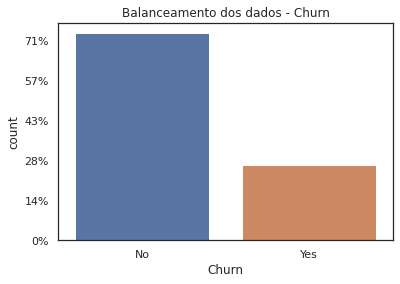



Os clientes Churn representam 26.54% do total


In [140]:
ax = sns.countplot(x="Churn", data=df)
plt.title('Balanceamento dos dados - Churn')
ax.set_yticklabels(['{:.0%}'.format(num) for num in ax.get_yticks()/len(df)])
plt.show()

churn_yes = df.Churn.value_counts()[1]/df.shape[0]
churn_no = df.Churn.value_counts()[0]/df.shape[0]

print('\n')
print('Os clientes Churn representam {:,.2%} do total'.format(churn_yes))

Agora, vamos partir para análise de outras variáveis do conjunto de dados para extrairmos informações relevantes, como por exemplo a correlação entre algumas variáveis ou os clientes mais propensos à cancelarem sua assinatura.

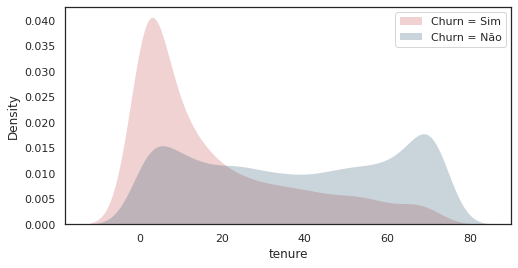

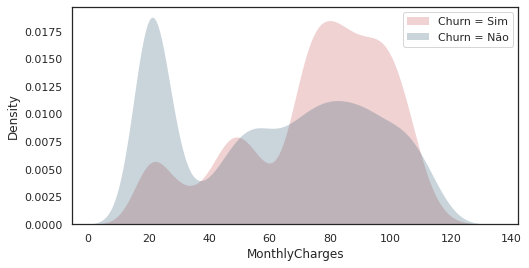

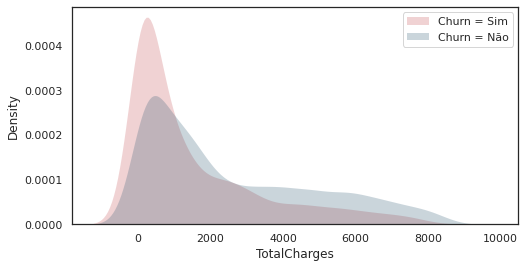

In [141]:
def plotar(var):
 # Função para plotar
 # gráficos de distribuição entre as variáveis e a Churn sim/não" 

  plt.figure(figsize=(8, 4))
  p1=sns.kdeplot(df[df['Churn'] == 'Yes'][var], shade=True, color="r", label='Churn = Sim', linewidth=0)
  p2=sns.kdeplot(df[df['Churn'] == 'No'][var], shade=True, color="#2d5973", label='Churn = Não', linewidth=0)
  plt.legend()
plotar('tenure')
plotar('MonthlyCharges')
plotar('TotalCharges')

plt.show()

Através dos gráficos acima vemos que a maioria dos cancelamentos ocorrem nos primeiros meses de contrato do serviço. Além disso, pessoas que gastam mais com as recargas estão mais propensas ao Churn. 

Veja como após um processamento inicial dos dados já temos informações valiosas para redução do Churn. Nesse exemplo, a empresa poderia implantar benefícios extras para pessoas com gastos maiores e nos primeiros meses de contrato.

Após isso, seria necessario acompanhar os indicadores para entender se as medidas foram efetivas e otimizar a estratrégia.

Vamos ver o boxplot das variáveis numéricas.

* Boxplot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis. 

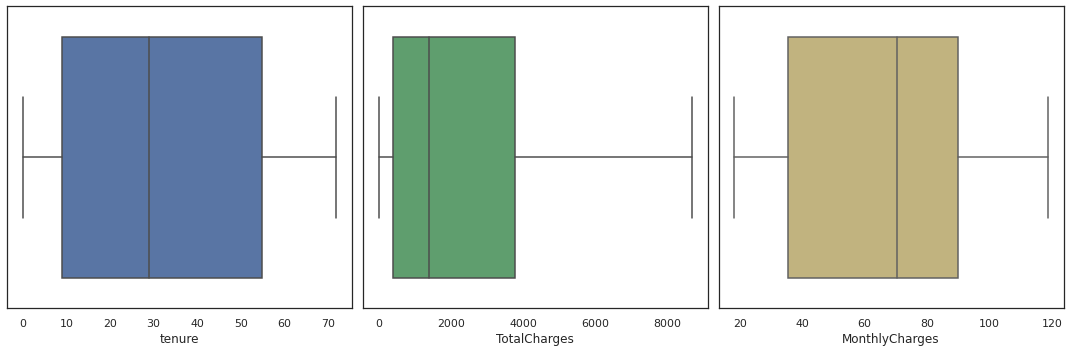

In [142]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data=df, x='tenure', color='b', ax=ax1)
sns.boxplot(data=df, x='TotalCharges', color='g', ax=ax2)
sns.boxplot(data=df, x='MonthlyCharges',color='y' , ax=ax3)

plt.tight_layout()


Através do boxplot não detectamos nenhum outlier evidente. 

In [143]:
def barplot_porcentagens(var, orient='v', axis_name="clientes"): 
    #função para criar os gráficos com porcentagens
    p = df.groupby(var)["Churn"].value_counts().to_frame()/df.shape[0]
    p = p.rename({"Churn": axis_name}, axis=1).reset_index() 

    ax = sns.barplot(x = var, y= axis_name, hue='Churn', data=p, orient=orient)
    ax.set_yticklabels(['{:.0%}'.format(num) for num in ax.get_yticks()])
    ax.plot()


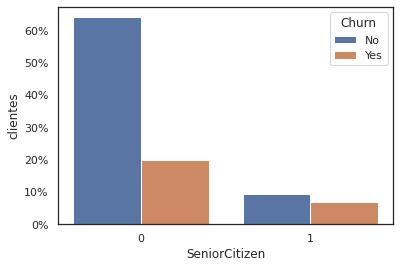

In [144]:
barplot_porcentagens('SeniorCitizen')

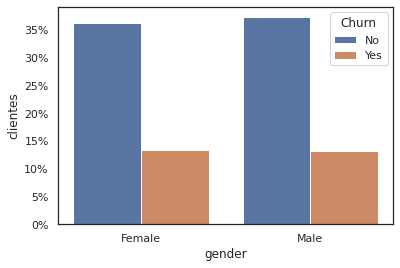

In [145]:
barplot_porcentagens("gender")

O gênero dos clientes não possuem influência na sua probabilidade de cancelamento.

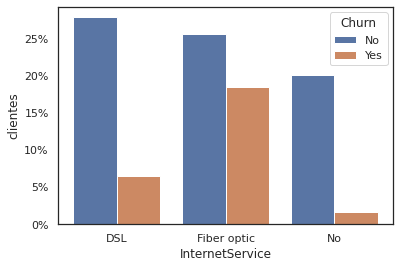

In [146]:
barplot_porcentagens("InternetService")

As pessoas que possuem o serviço de internet fibra ótica contrato aparentam ser mais propensos a cancelar os serviços.

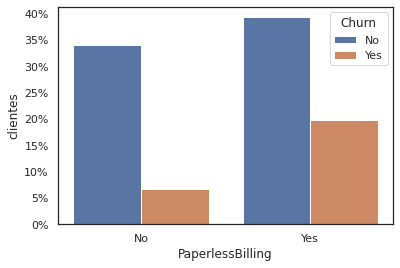

In [147]:
barplot_porcentagens('PaperlessBilling')

Pessoas que efetuam através de "papeis" são menos provaveis a cancelarem o serviço.





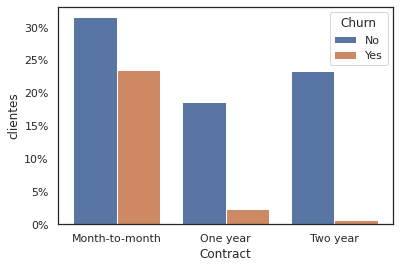

In [148]:
barplot_porcentagens('Contract')

Contratos de maior duração possuem um menor Churn.

In [149]:
#selecionar colunas para gráfico Churn para clientes com parceiros ou não
partner = df.groupby('Partner')['Churn'].value_counts()
partner = partner.to_frame().rename({'Churn': 'clientes'}, axis=1).reset_index()
partner

,Partner,Churn,clientes
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


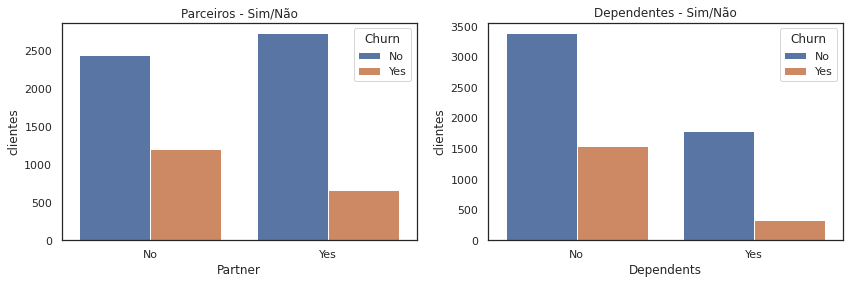

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.set_title("Parceiros - Sim/Não")
ax2.set_title("Dependentes - Sim/Não")

# Plotar Partner column
ax = sns.barplot(x='Partner', y= 'clientes', hue='Churn', data=partner, ax=ax1)

# Plot Dependents column
dep = df.groupby('Dependents')["Churn"].value_counts()
dep = dep.to_frame().rename({"Churn": 'clientes'}, axis=1).reset_index()

sns.barplot(x='Dependents', y='clientes', data = dep, hue='Churn');

plt.show()

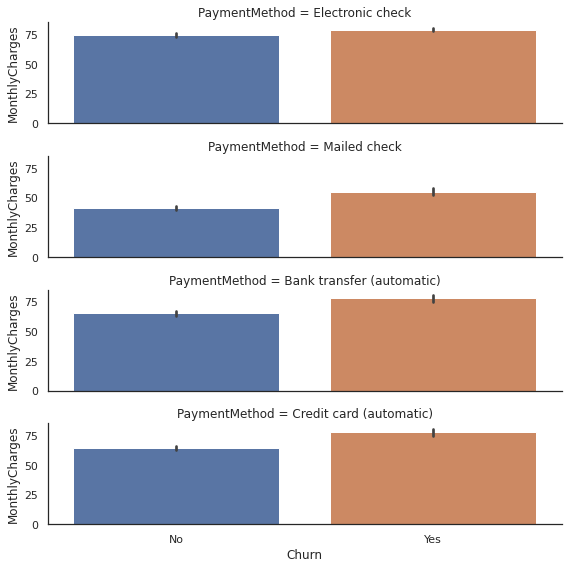

In [151]:
ax = sns.catplot(x="Churn", y="MonthlyCharges", row="PaymentMethod", kind="bar", data=df, height=2, aspect=4, orient='v')

plt.tight_layout()

## Preparação dos dados
Nessa etapa faremos o tratamento dos dados para que possamos realizar o treinamento do nosso modelo de Machine Learning

In [152]:
#copiar o dataset original  
df_enc = df.copy()

Agora, iremos transformar as variáveis categóricas em numéricas para que possamos treinar nossos modelos. Para isso utilizaremos o LabelEncoder para variáveis binárias e o get_dummy para variáveis categóricas não binárias, disponível na biblioteca sklearn.

**O que são variáveis categóricas?**
> Variáveis categóricas também são chamadas variáveis quantitativas ou variáveis de atributo. Os valores de uma variável categórica são categorias ou grupos mutuamente exclusivos. Os dados categóricos podem ou não ter alguma ordem lógica.
Fonte: [Mintlab](https://support.minitab.com/pt-br/minitab/20/help-and-how-to/statistics/tables/supporting-topics/basics/categorical-and-quantitative-variables/)

In [153]:
#importar encoder
from sklearn.preprocessing import LabelEncoder

#parametrizar
le = LabelEncoder()

for c in categorias_binarias:
  df_enc[c] = le.fit_transform(df_enc[c])
  print(c, 'passou pelo LabelEncoder')

gender passou pelo LabelEncoder
SeniorCitizen passou pelo LabelEncoder
Partner passou pelo LabelEncoder
Dependents passou pelo LabelEncoder
PhoneService passou pelo LabelEncoder
PaperlessBilling passou pelo LabelEncoder
Churn passou pelo LabelEncoder


Vamos ver como ficaram nossas variáveis categóricas binárias.

In [154]:
df_enc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Vamos ver quais eram os valores da variável gender e como eles ficaram após passar pela transformação em variáveis categóricas.


In [155]:
print('Antes:', df.gender.unique(), '\n')
print('Depois:', df_enc.gender.unique())

Antes: ['Female' 'Male'] 

Depois: [0 1]


Como podemos ver, os valores categóricos Male e Female, foram transformados em 1 e 0, respectivamente. Isso ajudará no treinamento do nosso modelo de machine learning.



Vamos verificar se há alguma correlação evidente entre as variáveis.

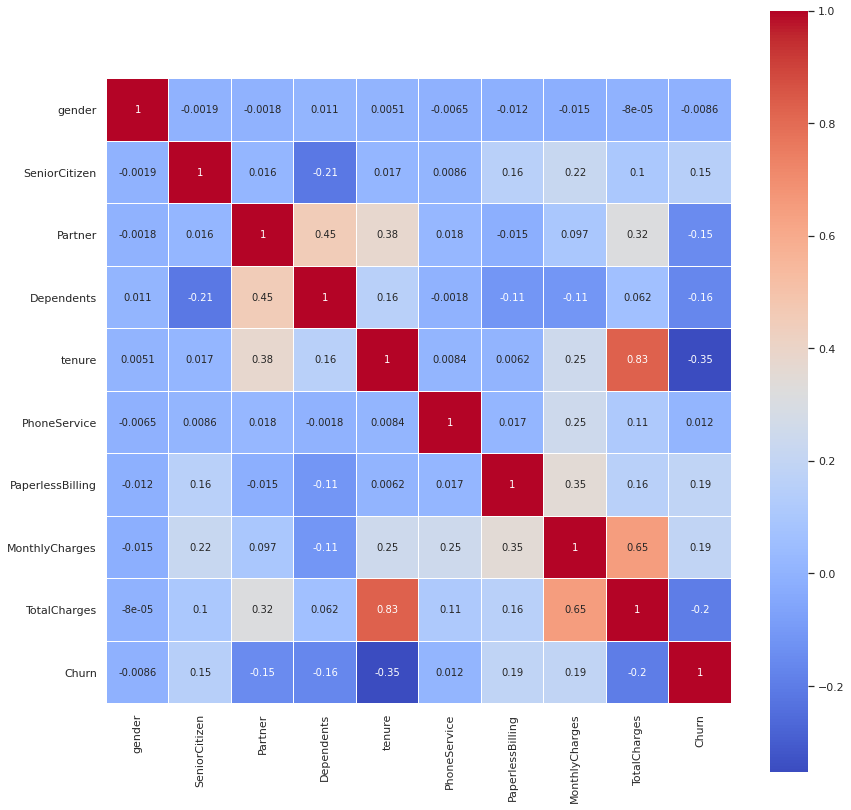

In [156]:
corr = df_enc.corr()

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, square=True, annot=True, linewidths=.1, cmap = 'coolwarm');

Agora, também vamos transformar as variáveis categóricas não binárias, utilizando a função get_dummy

In [157]:
#converter variaveis dummy

df_enc = pd.get_dummies(df_enc, columns=categorias_n_binarias)

for c in categorias_n_binarias:
  print('A variável {} foi transformada'.format(c))

A variável MultipleLines foi transformada
A variável InternetService foi transformada
A variável OnlineSecurity foi transformada
A variável OnlineBackup foi transformada
A variável DeviceProtection foi transformada
A variável TechSupport foi transformada
A variável StreamingTV foi transformada
A variável StreamingMovies foi transformada
A variável Contract foi transformada
A variável PaymentMethod foi transformada


In [158]:
df_enc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


### Balancear os dados

Como vimos acima, os dados da variável Churn estão desbalanceados, possuindo uma quantiade muito maior de uma categoria do que outra. Chegou a hora de balancear o conjunto de dados para que não haja viés nas previsões. Para isso, vamos utilizar o SMOTE.


>A SMOTE (técnica de sobreamostragem minoritária sintética) é uma técnica estatística para aumentar o número de casos em seu conjunto de um modo equilibrado. O módulo funciona gerando novas instâncias de casos minoritários existentes que você fornece como entrada. Essa implementação de SMOTE não altera o número de casos de maioria.


Fonte: [Microsoft Machine Learning](https://docs.microsoft.com/pt-br/azure/machine-learning/algorithm-module-reference/smote#:~:text=A%20SMOTE%20(t%C3%A9cnica%20de%20sobreamostragem,dataset%20in%20a%20balanced%20way.)

In [159]:
!pip install imbalanced-learn -q
#Importing SMOTE
from imblearn.over_sampling import SMOTE

Como é a distribuição atual da variável Churn


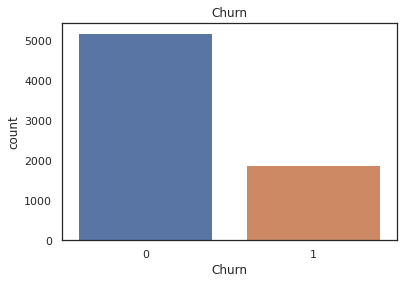



Os clientes Churn representam 26.54% do total


In [160]:
ax = sns.countplot(x="Churn", data=df_enc)
plt.title('Churn')
plt.show()

churn_yes = df_enc.Churn.value_counts()[1]/df.shape[0]
churn_no = df_enc.Churn.value_counts()[0]/df.shape[0]

print('\n')
print('Os clientes Churn representam {:,.2%} do total'.format(churn_yes))

In [161]:
#1 parametrizar 
smt = SMOTE()

#2 separar o modelo entre features e target
X = df_enc.drop('Churn', axis=1)
y = df_enc.Churn

#aplicar smote nos dados
X, y = smt.fit_sample(X, y)

Como ficaram os dados da variável Churn após a aplicação do SMOTE

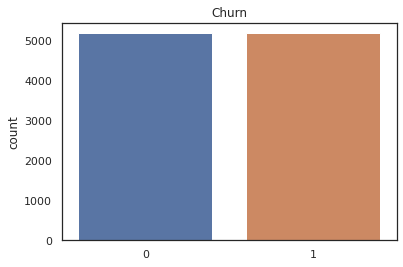



[5174 5174]
Agora temos 10348 entradas
sendo 50% para Churn Sim e 50% para Churn Não


In [162]:
ax = sns.countplot(x = y)
plt.title('Churn')
plt.show()

print('\n')
print(np.bincount(y))
print('Agora temos {} entradas'.format(y.shape[0]))
print('sendo 50% para Churn Sim e 50% para Churn Não')

## Construção do modelo

Agora que nossos dados já estão balanceados e devidamente preparados, vamos dar início ao processo de construção do nosso modelo que será responsável por prever se um cliente cancelará o serviço ou não.

Estamos lidando com um problema de classificação, então utilizaremos modelos que condizem com a nosso necessidade de classficar 

* Churn 
   * Sim 
   * Não


In [163]:
!pip install scikit-plot -q

In [164]:
#importando as bibliotecas que serão utilizadas

#métricas 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

#modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

Vamos utilizar 4 modelos de classificação para comparação e definir qual será o que possui o melhor desempenho dentre os 4 escolhidos.

Os modelos são:
* Árvore de decisão
* Regressão Logística
* SVC (Support Vector Machine)
* Floresta de decisão aleatória

A seguir, faremos as seguintes etapas:


*   Dividir nossos dados em treino e teste para que não ocorra overfitting
*   Normalizar os dados
*   Treinar os modelos





In [165]:
#1 importar modelos
dt = DecisionTreeClassifier()
lr = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()

names = ['Decision Tree', 'Logistic Regression', 'SVC', 'Random Forest']
classifiers = [dt, lr, svc, rf]

#4 separar entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)


#4.1 normalizar os dados
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#5 treinar modelo
model_dt = dt.fit(X_train, y_train)
model_lr = lr.fit(X_train, y_train)
model_svc = svc.fit(X_train, y_train)
model_rf = rf.fit(X_train, y_train)


Após treinarmos os modelos nos dados de treino, vamos verificar seu desempenho através de Cross-validation

In [166]:
print('Cross Validation dos Modelos: recall\n')
models = (model_dt, model_lr, model_svc, model_rf)
for n, m in zip(names, models):
    scores = cross_val_score(m, X_train, y_train, cv=5, scoring='recall')
    print(n, "tem recall de : %0.3f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print('')
print('Cross Validation dos Modelos: Acurácia\n')
for n, m in zip(names, models):
    scores_2 = cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')
    print(n, "tem acurácia de: %0.3f (+/- %0.2f)\n" % (scores_2.mean(), scores_2.std() * 2))

Cross Validation dos Modelos: recall

Decision Tree tem recall de : 0.808 (+/- 0.02)

Logistic Regression tem recall de : 0.826 (+/- 0.03)

SVC tem recall de : 0.832 (+/- 0.03)

Random Forest tem recall de : 0.827 (+/- 0.03)


Cross Validation dos Modelos: Acurácia

Decision Tree tem acurácia de: 0.804 (+/- 0.01)

Logistic Regression tem acurácia de: 0.776 (+/- 0.01)

SVC tem acurácia de: 0.828 (+/- 0.01)

Random Forest tem acurácia de: 0.855 (+/- 0.01)



Vemos que os modelos Random Forest e SVC foram os que tiveram um melhor desempenho.
 
Agora, daremos início a parametrização para otimizar o modelo de Floresta de Decisão. 

#### Tunning dos parâmetros

In [167]:
parametros = {'n_estimators': [10,15,20,30,50,75,100]}
parametros_d = {'max_depth': [5,7,10,15,20,30]}

grid_search = GridSearchCV(rf, parametros, scoring="recall")
clf = GridSearchCV(rf, parametros)
clf.fit(X_train, y_train)

# ver melhor parâmetro
print(clf.best_params_)
# ver todos parâmetros testados
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

{'n_estimators': 50}
0.846 (+/-0.012) for {'n_estimators': 10}
0.849 (+/-0.013) for {'n_estimators': 15}
0.852 (+/-0.020) for {'n_estimators': 20}
0.852 (+/-0.011) for {'n_estimators': 30}
0.858 (+/-0.009) for {'n_estimators': 50}
0.856 (+/-0.009) for {'n_estimators': 75}
0.855 (+/-0.014) for {'n_estimators': 100}


In [ ]:
grid_search = GridSearchCV(rf, parametros_d, scoring="recall")
clf = GridSearchCV(rf, parametros_d)
clf.fit(X_train, y_train)

# ver melhor parâmetro
print(clf.best_params_)
# ver todos parâmetros testados
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

> Quais as features foram as mais importantes para a criação do modelo de Random Forest?

In [ ]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.4f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Verificar o modelo parametrizado
Temos nosso modelo escolhido e validado através dos dados de treino, agora chegou a hora de testar com nossos dados de teste e ver como ele vai se sair!

In [ ]:
#1 importar modelos
rf = RandomForestClassifier(max_depth=10, n_estimators=100)

#2 treinar modelo
model_rf = rf.fit(X_train, y_train)

#3 ML nos dados de teste
y_pred_rf = model_rf.predict(X_test)

#4 Classification Report
print(classification_report(y_test, y_pred_rf))
print("Recall: {:.3f}\n".format(recall_score(y_test, y_pred_rf)))
print("Acurácia: {:.3f}\n".format(accuracy_score(y_test, y_pred_rf)))
print("AUC: {:.3}\n".format(roc_auc_score(y_test, y_pred_rf)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True,
                                    title='Random Forest',
                                    title_fontsize=16,
                                    text_fontsize=14);
                                  

Pronto! Nosso modelo está treinado e pronto para ser implementado na previsão de Churns! Na base de teste o modelo conseguiu prever corretamente 86% dos clientes que viriam a cancelar o serviço. 

## Conclusão 
Além de aprender sobre Churn e o poder da retenção de clientes em uma empresa, conseguimos extrair informações valiosas do conjunto de dados.

Foi realizada a análise e o tratamento dos dados, bem como o ajuste das variáveis categóricas para que fosse possível treinar e implementar o modelo de machine learning.

Após o treinamento dos modelos, optamos utilizar o modelo de Random Forest, então, foi feito a otimização dos parâmetros do modelo.

Em seguida usamos o modelo treinado para fazer as previsões nos dados de teste, obtendo uma pocentagem de 86% para clientes que se tornariam Churn. Ainda há muitas otimizações que podem ser feitas, mas através desse projeto foi alcançado um excelente resultado, capaz de oferecer informações valiosas para a empresa, ajudado a mesma a atingir seu objetivo de reduzir a Churn Rate e aumentar a receita.


